# Chapter 1 - scikit learn Introduction
sklearn

<br></br>
## 1 KNN을 활용한 Iris 붓꽃 분류
특징 추출 하기

### 01 Import Data Sets
sklearn.datasets

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# iris_dataset 의 살펴보기
# Data Sample 내용 확인

print("Data-Key  name      : {}".format(iris_dataset.keys()))
print("Data Type           : {}".format(type(iris_dataset['data'])))
print("Data (feature) name : {}".format(iris_dataset['feature_names'])) 
print("Data Shape          : {}".format(iris_dataset['data'].shape))

Data-Key  name      : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Data Type           : <class 'numpy.ndarray'>
Data (feature) name : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data Shape          : (150, 4)


In [2]:
# Target 데이터 (궁극적 목표) : 붓꽃 종류 구별하기

print("Target Name  : {}".format(iris_dataset['target_names']))   
print("Target Type  : {}".format(type(iris_dataset['target'])))
print("Target Shape : {}".format(iris_dataset['target'].shape))
print("Target data  : {}".format(iris_dataset['target']))

Target Name  : ['setosa' 'versicolor' 'virginica']
Target Type  : <class 'numpy.ndarray'>
Target Shape : (150,)
Target data  : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
iris_dataset_kor = ['꽃밭침 (cm) 길이', '꽃밭침 너비 (cm)', '꽃잎 길이(cm)', '꽃잎 너비(cm)']
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# Showing Data Sample

print("Data (feature) name : \n{}".format(iris_dataset['feature_names'])) 
#print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))
import pandas as pd
pd.DataFrame(iris_dataset['data'][:5], columns=iris_dataset_kor)

Data (feature) name : 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,꽃밭침 (cm) 길이,꽃밭침 너비 (cm),꽃잎 길이(cm),꽃잎 너비(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# 5번쨰 데이터 까지 확인결과
# petal width 의 길이는 0.2로 모두 동일하다
# 0번 index 꽃이 5.1로 가장 긴 길이의 꽃받침을 가졌다

### 02 성과의 측정
Model의 성능 테스트

In [6]:
# 자동으로 데이터를 섞은뒤 분류 
# Train : 75%, Test : 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state = 0) #test_size=0.33

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [7]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


In [8]:
import matplotlib
matplotlib.rc('font', family='NanumGothic')

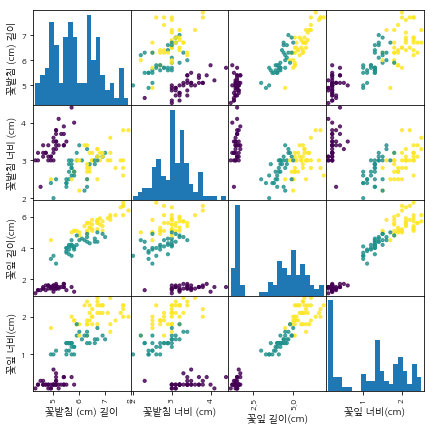

In [9]:
# 분리한 데이터 살펴보기 : 이산치 여부 및 데이터 분석 방향을 결정
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

# X_train 데이터를 사용하여, 데이터프레임을 만든다 (iris_dataset.feature_names으로 컬럼사용)
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset_kor) # iris_dataset.feature_names
# y_train에 따라 색상별 구별된 산점도 행렬을 생성한다
scatter_matrix(iris_dataframe, c=y_train, figsize=(7, 7), marker='o',
                           hist_kwds={'bins': 20}, s = 10, alpha=.8) #, cmap=mglearn.cm3)
plt.show()

In [10]:
# 해석
# 꽃잎과 꽃밭침의 측정값에 따른, target 별 구분이 잘 됨을 알 수 있다 (대각선으로 색깔별 구분이 가능)
# 이것으로 미루어 보아, 클래스를 잘 구분하도록 머신러닝을 학습할 수 있음을 알 수 있다.

### 03 KNN 분류 (모델의 생성)
K - Nearest Neighbors

개별 데이터와 가까운 이웃 그룹을 1개만 지정하여 그루핑을 한다 (각기 따로 따로 묶인다)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)  # 'knn'객체에 훈련 데이터를 통쨰로 저장한다

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### 04 KNN 모델의 평가
knn.predict()

In [12]:
import numpy as np
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score: 0.97
Test set score: 0.97


In [13]:
# 결과
# 모델의 정확도가 97%로, 외부에 사용하기에 적합한 모델로 평가가 된다

### 05 KNN 분류 모델을 활용한 예측
knn.predict(X_new)

In [14]:
# [[5, 2.9, 1, 0.2]] : 훈련을 2차원으로 해서, 
# 비교데이터도 꼮! 2차원으로 입력해야 한다
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)

print("X_new.shape: {}".format(X_new.shape))
print("Predict: {}, Target name: {}".format(prediction, # 예측 결과가 feature로 출력 
                                            iris_dataset['target_names'][prediction])) # feature 이름으로 변경

X_new.shape: (1, 4)
Predict: [0], Target name: ['setosa']
